<a href="https://colab.research.google.com/github/huedits/DSNP/blob/master/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-04-28/visualisations/listings.csv")

## Análise dos Dados

Aqui vamos fazer uma análise inicial com o intuito de entender a estrutura dos dados dentro do *dataset*.

**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4183,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,11048,3,165,2020-03-04,1.57,1,271
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4171,28,113,2020-02-17,1.18,2,241
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6952,28,103,2020-04-16,1.39,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3957,28,103,2019-10-04,1.12,2,340


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Agora que temos uma idéia da estrutura do nosso Data Frame, vamos verificar quantas entradas (linhas) e quantos atributos (colunas) nós temos.

Lembrando que este *dataset* é uma versão resumida do Airbnb. Na mesma página em em que baixamos o `listings.csv` há uma versão mais completa com 106 atributos chamado `listings.csv.gz`.

In [7]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Atributos:\t {}\n".format(df.shape[1]))

# verificar os tipos de variáveis
display(df.dtypes)

Entradas:	 15352
Atributos:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Precisamos entender logo no início se a quantidade de valores faltantes é significativa em relação ao número total de entradas. Assim podemos definir a qualidade do *dataset*.
* Podemos ver que `neighbourhood_group` possui 100% de seus dados faltantes.
* As colunas `reviews_per_month` e `last_review` ambas possuem 17% dos seus dados faltantes, porém essas informações não serão relevantes para a nossa análise.
* Por último, a coluna `host_name` possui apenas 0.07% dos seus dados faltantes. Este campo também não será importante, porém mesmo que fosse, a quantidade de informações faltantes é insignificante.

Com isso, podemos concluir que a qualidade do *dataset* é muito boa.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.170010
last_review                       0.170010
host_name                         0.000717
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Vamos verificar a distribuição dos valores nas variáveis através de um histograma.

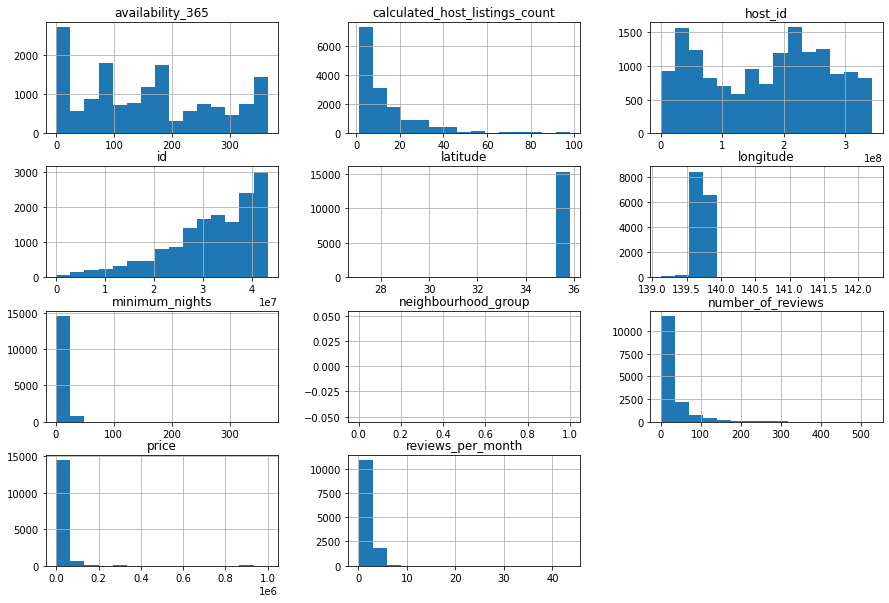

In [26]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há outliers presentes?**

Podemos ver que os histogramas de  `minimum_nights` e `price` estão sendo prejudicados por outliers, por isso vamos identificar quais são para removê-los.

Para isso faremos:
* Resumo estatístico usando o método `describe()`.
* Usar `boxplot` para as variáveis.

In [129]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights','availability_365','latitude','longitude','number_of_reviews','reviews_per_month']].describe()

,price,minimum_nights,availability_365,latitude,longitude,number_of_reviews,reviews_per_month
count,1.535200e+04,15352.000000,15352.000000,15352.000000,15352.000000,15352.000000,12742.000000
mean,2.624158e+04,3.293968,155.732348,35.694985,139.735174,26.542731,1.695281
std,7.636344e+04,9.114849,115.567651,0.142427,0.081392,40.566386,1.365650
min,0.000000e+00,1.000000,0.000000,27.072330,139.123190,0.000000,0.020000
25%,6.952000e+03,1.000000,63.000000,35.686230,139.699457,2.000000,0.690000
50%,1.197900e+04,1.000000,150.000000,35.703020,139.728075,11.000000,1.500000
75%,2.000100e+04,2.000000,247.000000,35.725082,139.785050,34.000000,2.400000
max,1.000053e+06,365.000000,365.000000,35.832430,142.202880,529.000000,43.600000


Nas informações acima podemos verificar que:
* Na coluna `price`, 75% das entradas tem valor abaixo de ¥20.001, porém o maior valor é ¥1.000.053.
* Em `minimum_nights` (quantidade mínima de noites) o maior valor é 365.

#### Boxplot para `minimum_nights`:

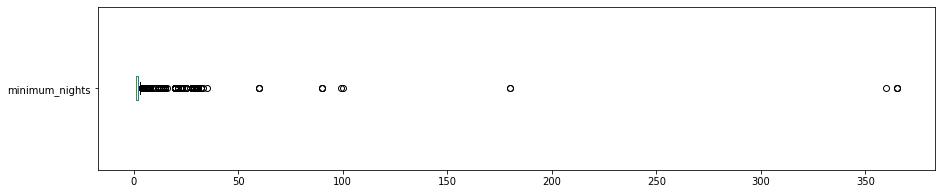

minimum_nights
Valores acima de 30: 45 entradas
Porcentagem: 0.2931%


In [16]:
# minimum_nights
df.minimum_nights.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights")
print("Valores acima de 30: {} entradas.".format(len(df[df.minimum_nights > 30])))
print("Porcentagem: {:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))

#### Boxplot para `price`:

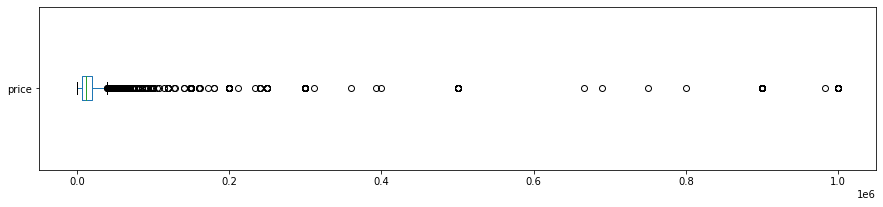

price
Valores acima de ¥200.000: 208 entradas.
Porcentagem: 1.3549%


In [20]:
# price
df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de ¥200.000
print("price")
print("Valores acima de ¥200.000: {} entradas.".format(len(df[df.price > 200000])))
print("Porcentagem: {:.4f}%".format((len(df[df.price > 200000]) / df.shape[0]) * 100))

#### **Histograma sem outliers**

Agora que identificamos os outliers, vamos refazer o histograma.

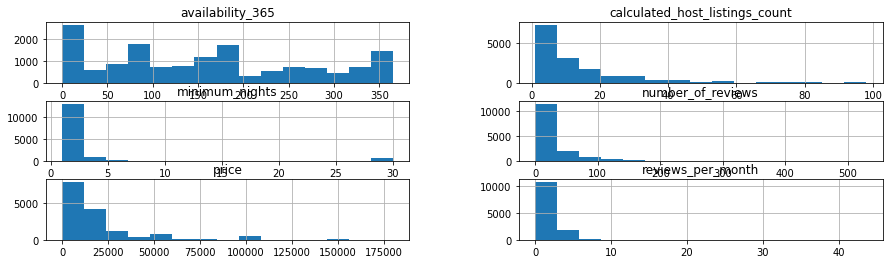

In [115]:
# remover outliers de um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group` pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar novo histograma
df_clean.hist(bins=15, figsize=(15,4), column=['availability_365','calculated_host_listings_count','minimum_nights','price','number_of_reviews','reviews_per_month']);

### **Q5. Qual a média dos preços de aluguel?**

Agora que tiramos os *outliers* e temos as informações mais limpas, vamos verificar qual o preço médio dos imóveis.

*Como o Iene não possui casa decimal, vou arredondar o valor.*

In [116]:
# ver a média da coluna `price``
round(df_clean.price.mean())

18848

### **Q6. Qual a correlação existente entre as variáveis**

Correlação significa uma relação entre duas coisas. Neste contexto, vamos buscar entender *se* e *como* uma variável afeta as outras.

Para identificar as correlações, vou:
* Criar uma matriz de correlação.
* Gerar um heatmap dessa matriz para facilitar a visualização.

In [117]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.052324,-0.060730,0.049878,0.146095,0.159839
minimum_nights,-0.052324,1.000000,-0.032167,-0.133688,0.047880,0.060267
number_of_reviews,-0.060730,-0.032167,1.000000,0.660962,-0.171898,0.013366
reviews_per_month,0.049878,-0.133688,0.660962,1.000000,-0.140090,0.033113
calculated_host_listings_count,0.146095,0.047880,-0.171898,-0.140090,1.000000,0.075915
availability_365,0.159839,0.060267,0.013366,0.033113,0.075915,1.000000


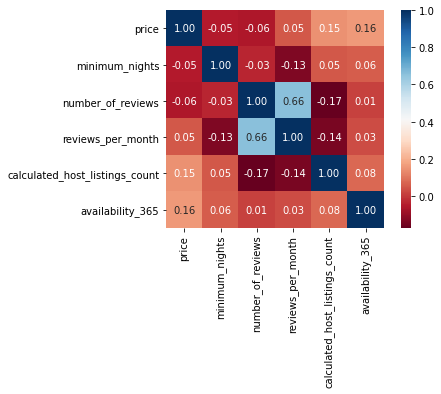

In [118]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

No Airbnb, existem diferentes tipos de locação. Podendo alugar desde um quarto compartilhado com outras pessoas até uma casa inteira.

A variável `room_type` nos mostra qual é o tipo de locação e vamos utilizá-la para fazer uma contagem de cada tipo.

In [119]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10312
Private room        3325
Hotel room           739
Shared room          723
Name: room_type, dtype: int64

In [120]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df.shape[0]) * 100

Entire home/apt    67.170401
Private room       21.658416
Hotel room          4.813705
Shared room         4.709484
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**

Uma informação importante de saber antes de escolher a acomodação, é qual é a média de preço de cada região.

Aqui vamos usar a variável `neighbourhood` para separar as casas por bairro e então, vamos exibir a média de preço (`mean`) de cada um deles.

Além de saber o preço, também é importante verificar a quantidade de acomodações em cada região, então vamos agregar a contagem (`count`) à tabela.

In [121]:
df_agg = df_clean.groupby('neighbourhood').aggregate({'price':['mean','count']})

print(df_agg.round().sort_values(('price',  'mean'), ascending=False).to_string(max_rows=10))

                       price      
                        mean count
neighbourhood                     
Chuo Ku              38636.0   603
Bunkyo Ku            25417.0   191
Taito Ku             20899.0  2087
Shinagawa Ku         20711.0   261
Shinjuku Ku          19926.0  2785
...                      ...   ...
Fussa Shi             3701.0     5
Kunitachi Shi         3583.0    10
Higashiyamato Shi     2995.0     1
Musashimurayama Shi   2959.0     6
Inagi Shi             1764.0     2


Acima podemos ver os 5 bairros com a maior média de preço e os 5 bairros com a menor média de preço.

Agora, vamos utilizar os campos `longitude` e `latitude` para plotar a localização de cada um imóvel disponível.

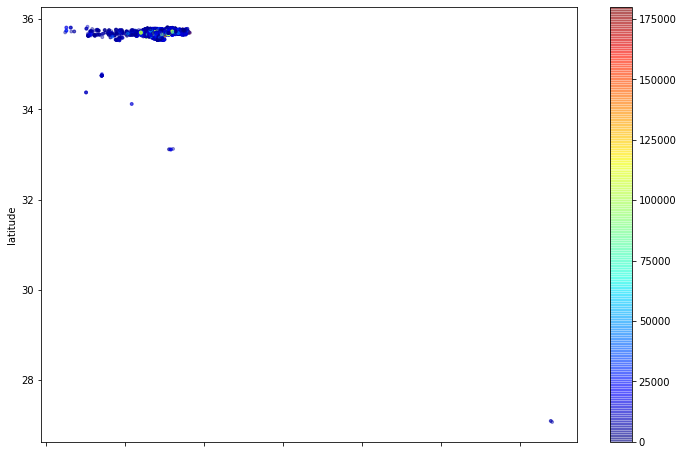

In [122]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Percebemos pelo mapa que temos *outliers* nos campos de `latitude` e `longitude`. Vamos verificar o que está errado:

In [123]:
# verificar a quantidade de entradas com valores irreais

print("latitude")
print("Valores abaixo de 35.5: {} entradas.".format(len(df_clean[df_clean.latitude < 35.5])))
print("Porcentagem: {:.4f}%".format((len(df_clean[df_clean.latitude < 35.5]) / df_clean.shape[0]) * 100))

print("\nlongitude")
print("Valores acima de 30: {} entradas.".format(len(df_clean[df_clean.longitude > 140])))
print("Porcentagem: {:.4f}%".format((len(df_clean[df_clean.longitude > 140]) / df_clean.shape[0]) * 100))

latitude
Valores abaixo de 35.5: 29 entradas.
Porcentagem: 0.1921%

longitude
Valores acima de 30: 3 entradas.
Porcentagem: 0.0199%


Agora vamos remover estes valores do nosso *dataset* e fazer um novo plot.

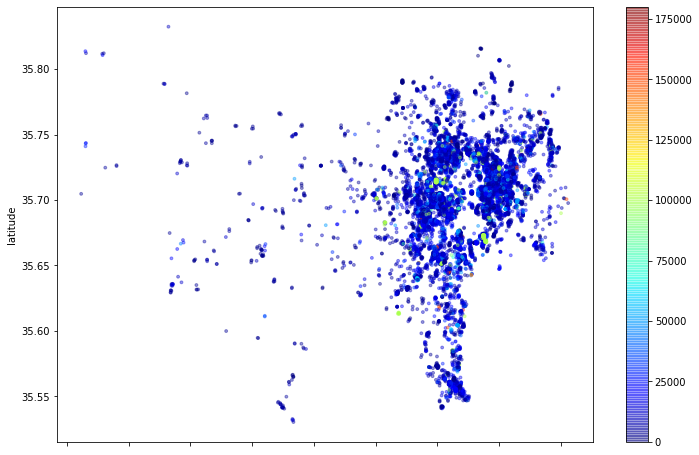

In [124]:
# remover os outliers
df_clean.drop(df_clean[df_clean.latitude < 35.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.longitude > 140].index, axis=0, inplace=True)

# novo plot
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Por último, vamos verificar qual é a média da quantidade mínima de noite (`minimum_nights`).

In [128]:
# ver a média da coluna `minimum_nights``
print("A média da quantidade mínima é {:.1f} noites.".format(df_clean.minimum_nights.mean()))

A média da quantidade mínima é 3.1 noites.


## Conclusões

A partir dessa análise realizada com o *dataset* resumido, tiramos algumas conclusões.
* O dataset tem poucos valores faltantes.
* Temos *outliers* em diversos campos, então é necessário muita atenção durante a análise dos dados.
* Tokyo possui uma grande variedade de valores disponíveis, porém a maioria das residências se encontram na área central da cidade. Sendo assim, não há muitas opções para quem prefere ficar em uma área mais periférica.
* A média de noites mínimas é baixa, então você pode se hospedar por períodos curtos de tempo.